# 第 5 节　泊松回归

## 第 6 章　广义线性模型｜用 Python 动手学统计学



### 4. 环境准备

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline


In [2]:
# 读取数据
beer = pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


### 5. 实现：泊松回归

In [3]:
# 建模
mod_pois = smf.glm("beer_number ~ temperature", beer, 
                   family=sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Wed, 17 Nov 2021   Deviance:                       5.1373
Time:                        18:01:05   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

### 6. 实现：模型选择

In [4]:
# 空模型
mod_pois_null = smf.glm(
    "beer_number ~ 1", data = beer, 
    family=sm.families.Poisson()).fit()

In [5]:
# 对比 AIC
print("空模型　：", mod_pois_null.aic.round(3))
print("气温模型：", mod_pois.aic.round(3))

空模型　： 223.363
气温模型： 119.343


### 7. 实现：回归曲线

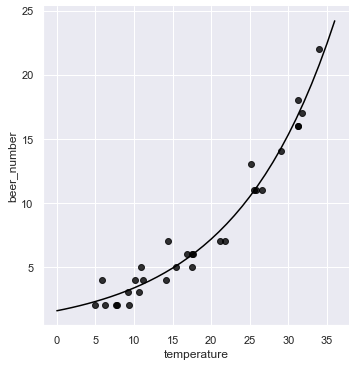

In [6]:
# 绘制回归曲线

# 计算预测值
x_plot = np.arange(0, 37)
pred = mod_pois.predict(
    pd.DataFrame({"temperature": x_plot}))

# 不含默认回归直线的 lmplot
sns.lmplot(y="beer_number", x = "temperature", 
           data = beer, fit_reg = False,
          scatter_kws = {"color":"black"})
# 绘出回归曲线
plt.plot(x_plot, pred, color="black")

### 8. 回归系数的含义

In [7]:
# 气温为 1 度时销售数量的期望
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

# 气温为 2 度时销售数量的期望
exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

# 气温每升高 1 度, 销量变为多少倍
pred_2 / pred_1

0    1.079045
dtype: float64

In [8]:
# e 的指数为回归系数
sp.exp(mod_pois.params["temperature"])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


1.079045054586893